In [1]:
from wavefronts import *
from recons import *


In [40]:
an = antenna_set('/Users/prunet/Documents/Code/ADFRecons/Chiche/87.1/coord_antennas.txt')
co = coincidence_set('/Users/prunet/Documents/Code/ADFRecons/Chiche/87.1/Rec_coinctable.txt',an)

 Reading antenna positions from file /Users/prunet/Documents/Code/ADFRecons/Chiche/87.1/coord_antennas.txt
 Reading coincidence(s): index, peak time, peak amplitude from file /Users/prunet/Documents/Code/ADFRecons/Chiche/87.1/Rec_coinctable.txt


In [83]:
theta,phi = (np.deg2rad(92.92),np.deg2rad(270.))
Xants = co.antenna_coords_array[0,:,:]
nants = Xants.shape[0]

# Select random subsample of antennas of size nants_real
nants_real = 10
#indices = np.random.choice(nants,nants_real)
#Xants = Xants[indices,:]
Xants = Xants[30:30+nants_real,:]

nsimus = 10000
theta_rec = np.zeros(nsimus); phi_rec = np.zeros(nsimus)

In [84]:
for i in range(nsimus):
    tants = PWF_simulation((theta,phi),Xants,sigma_t=5.e-9)
    theta_r, phi_r = PWF_minimize_alternate_loss(Xants,tants)
    theta_rec[i] = np.rad2deg(theta_r)
    phi_rec[i] = np.rad2deg(phi_r)

In [85]:
fish = PWF_Fisher((theta,phi),Xants,sigma_t = 5e-9)
cov = np.linalg.inv(fish)

In [86]:
%matplotlib inline
from matplotlib import pyplot as plt

(2, 2)

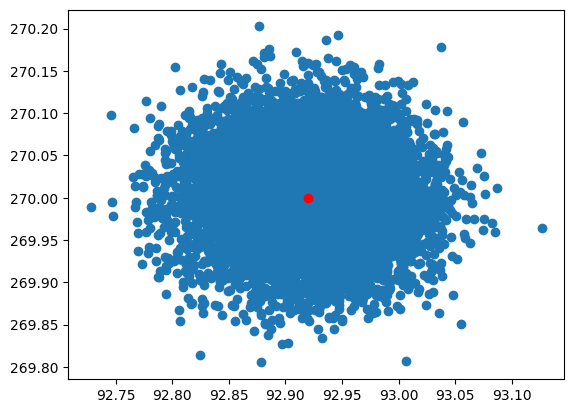

In [87]:
plt.scatter(theta_rec,phi_rec)
theta_deg = np.rad2deg(theta); phi_deg = np.rad2deg(phi)
plt.scatter(theta_deg,phi_deg,c='red')
# Plot Fisher matrix contours
fish.shape

In [88]:
params_deg = np.vstack((theta_rec,phi_rec))
params_cov = np.cov(params_deg)
params_cov

array([[ 2.41182733e-03, -1.11632950e-05],
       [-1.11632950e-05,  2.73798972e-03]])

In [89]:
cov * (180./np.pi)**2

array([[ 2.38383207e-03, -4.05427560e-05],
       [-4.05427560e-05,  2.75194112e-03]])

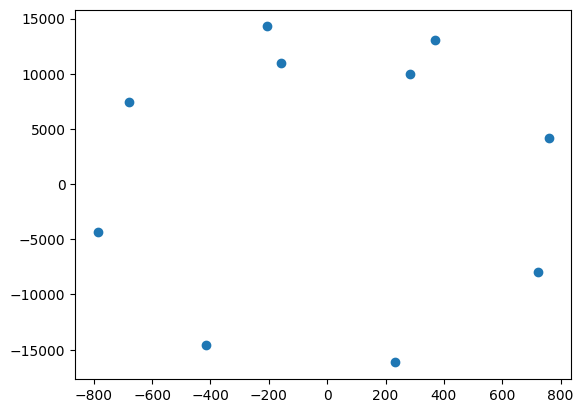

In [90]:
plt.scatter(Xants[:,0],Xants[:,1])